In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns
from pathlib import Path

from matplotlib.ticker import MaxNLocator

from cv_charge_discharge import Ec

sns.set_style('ticks')


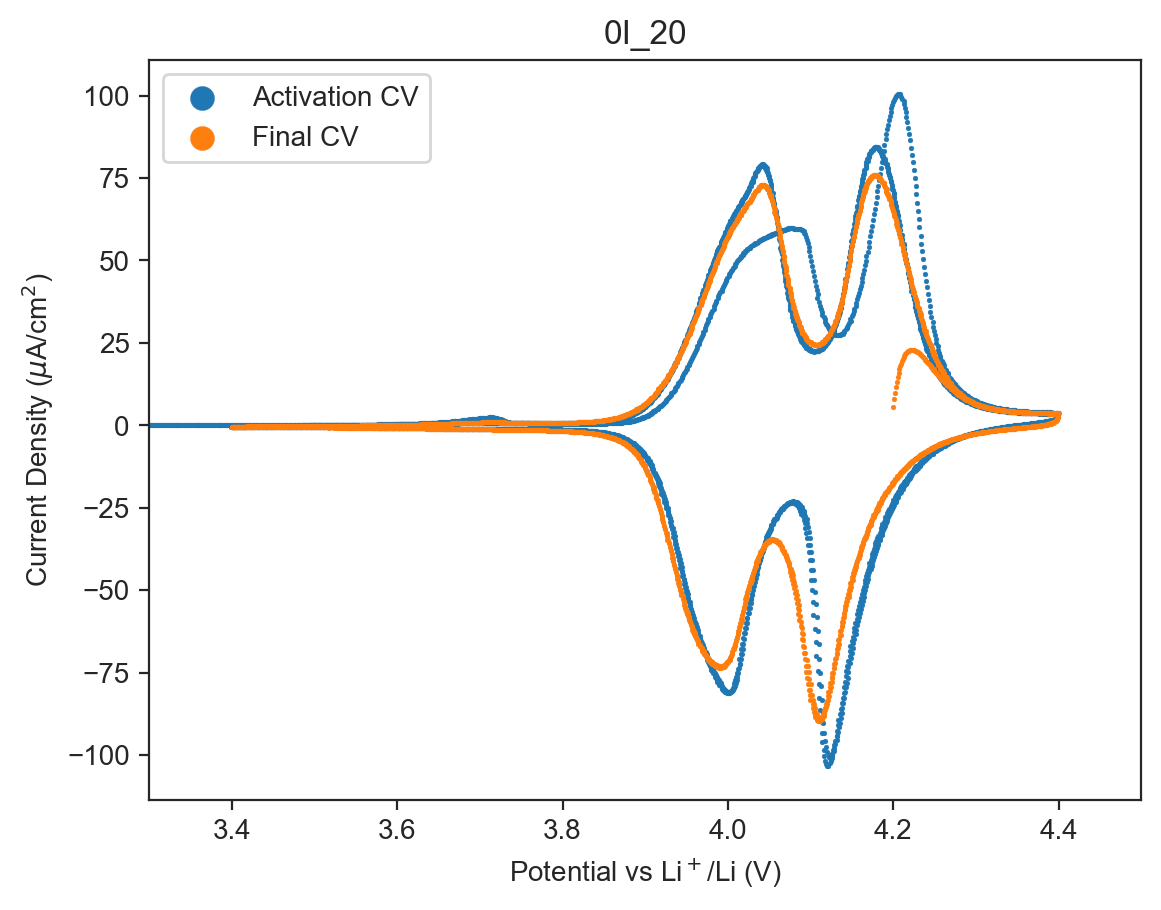

<Figure size 640x480 with 0 Axes>

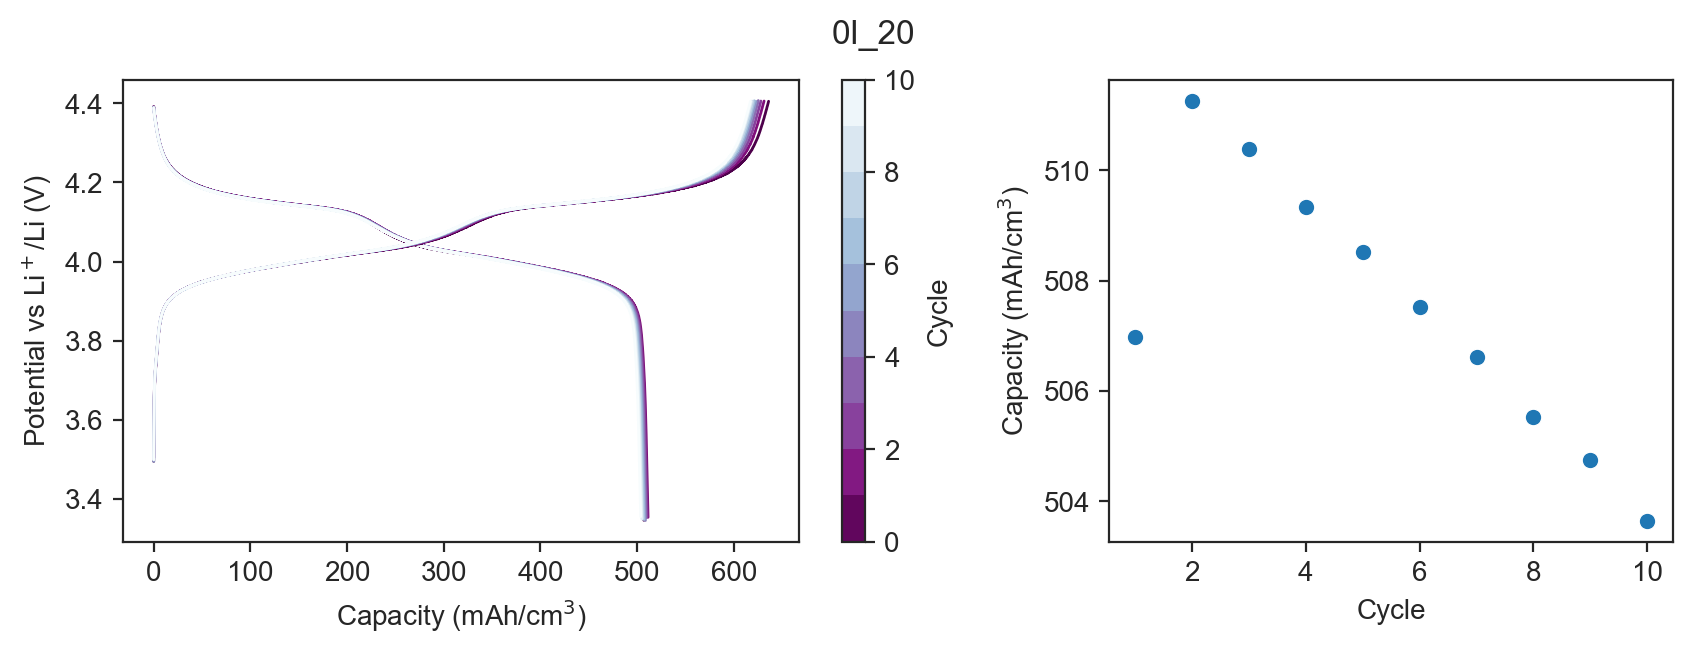

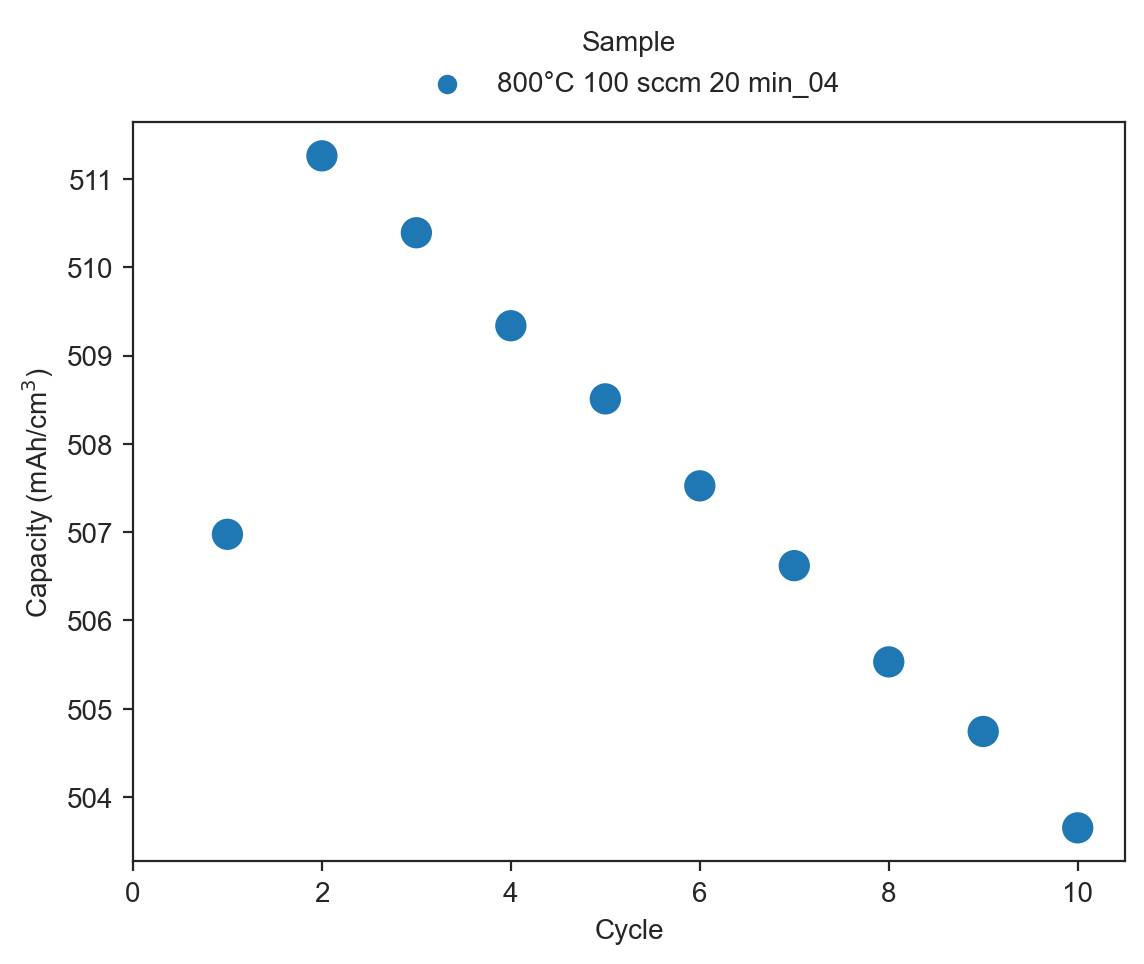

In [5]:

paths = {
        # '700°C 60 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
        #  '700°C 100 sccm 20 min ramp2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
        #  '800°C 100 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
        #  '800°C 1000 sccm 20 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11',
        #  '800°C 100 sccm 60 min' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_12',
        #  '800°C 100 sccm 20 min_01' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_13',
        #  '750°C 100 sccm 20 min ramp2_2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_14',
        #  '750°C 100 sccm 20 min ramp2_PLSA-Pt' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_15',
        #  '800°C 100 sccm 20 min ramp2_PLSA-Pt' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_16',
        #  '800°C 100 sccm 20 min ramp2_PLSA-Pt_2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_16_2',
        #  '800°C 100 sccm 60 min ramp2_PLSA-Pt_2' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_17',
        #  'Bias deposition 100 V' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_10\0J_01',
        #  'SiN CC' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_12\0L_01',
         '800°C 100 sccm 20 min_02' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_18',
         '800°C 100 sccm 20 min_03' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_19',
         '800°C 100 sccm 20 min_04' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_20',
        # 'ITO CC' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_21'
        # 'Annealed Pt' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_22'
        
         }
save_path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09'
lsb_09 = pd.DataFrame()
for i in paths.keys():
    cv, capacity = Ec.Electrochem(paths[i], 90)
    capacity['Sample'] = i
    lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
    
fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
ax = sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 150)
sns.move_legend(ax, "lower center", ncol = 2, bbox_to_anchor=(0.5, 1), frameon = False, title = 'Sample')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlim(0,10.5)
# plt.title('800°C O$_2$ 100 sccm 20 min ramp')
plt.show()
# lsb_09.to_csv(r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\lsb_09.txt', index = False)

# sns.scatterplot(data = cv, x = 'Potential vs Li$^+$/Li (V)', y = 'Current Density ($\mu$A/cm$^2$)', hue = 'CV', edgecolor = None, s = 10 )
# plt.legend(title = None)

In [3]:
# paths = {'0I_03' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_03',
#          '0I_04' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_04', 
#          '0I_07' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_07',
#          '0I_08' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_08',
#          '0I_09' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_09',
#          '0I_10' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_10',
#          '0I_11' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_11',
#          '0I_12' : r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\0I_12'}

# lsb_09 = pd.DataFrame()
# for i in paths.keys():
#     capacity = Ec.Electrochem(paths[i], 80)
#     capacity['Sample'] = i
#     lsb_09 = pd.concat([lsb_09, capacity], ignore_index = True)
#     plt.ioff()
# fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
# sns.scatterplot(data = lsb_09, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 100)

In [4]:
# path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\LSB_09\lsb_09.txt'
# df = pd.read_csv(path)
# fig, ax = plt.subplots(facecolor = 'white', dpi = 200)
# ax = sns.scatterplot(data = df, x = 'Cycle', y = 'Capacity (mAh/cm$^3$)', hue = 'Sample', style = 'Sample', s = 150)
# sns.move_legend(ax, "lower center", ncol = 2, bbox_to_anchor=(0.5, 1), frameon = False, title = None)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # x axis only integers
# plt.xlim(0,15.5)
# df